# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_longs and cities
lat_longs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [12]:
#setting up lists to hold return infos and set up counters

country_name = []
city_name = []
cloud = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

#Performing API calls
print ("_______________________________")
print("Data Retrieval starts ")
print ("_______________________________") 

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city list using enumerate method

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country_name.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. skipping to next........")
        
print("________________________________")
print("Data Retrieval Complets")
print("________________________________")

_______________________________
Data Retrieval starts 
_______________________________
Processing Record 1 of Set 1 : tiksi
Processing Record 2 of Set 1 : puerto carreno
Processing Record 3 of Set 1 : richards bay
Processing Record 4 of Set 1 : rikitea
Processing Record 5 of Set 1 : port alfred
City not found. skipping to next........
Processing Record 6 of Set 1 : kapit
Processing Record 7 of Set 1 : badiraguato
Processing Record 8 of Set 1 : mandera
Processing Record 9 of Set 1 : muros
City not found. skipping to next........
City not found. skipping to next........
Processing Record 10 of Set 1 : haines junction
Processing Record 11 of Set 1 : tuktoyaktuk
Processing Record 12 of Set 1 : cherskiy
Processing Record 13 of Set 1 : kaitangata
Processing Record 14 of Set 1 : busselton
Processing Record 15 of Set 1 : new norfolk
Processing Record 16 of Set 1 : barrow
Processing Record 17 of Set 1 : severnoye
Processing Record 18 of Set 1 : ushuaia
Processing Record 19 of Set 1 : kapaa
Proc

Processing Record 30 of Set 4 : dikson
Processing Record 31 of Set 4 : inongo
Processing Record 32 of Set 4 : aklavik
Processing Record 33 of Set 4 : necochea
Processing Record 34 of Set 4 : sibu
Processing Record 35 of Set 4 : altukhovo
Processing Record 36 of Set 4 : teguise
Processing Record 37 of Set 4 : esmeraldas
Processing Record 38 of Set 4 : marsa matruh
Processing Record 39 of Set 4 : caraquet
Processing Record 40 of Set 4 : arlit
City not found. skipping to next........
Processing Record 41 of Set 4 : sao filipe
Processing Record 42 of Set 4 : padang
Processing Record 43 of Set 4 : eyl
Processing Record 44 of Set 4 : wasco
Processing Record 45 of Set 4 : uvinza
Processing Record 46 of Set 4 : port lincoln
Processing Record 47 of Set 4 : oeiras do para
Processing Record 48 of Set 4 : requena
Processing Record 49 of Set 4 : atakpame
Processing Record 50 of Set 4 : east london
Processing Record 0 of Set 5 : petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 : chuy
Processin

Processing Record 15 of Set 8 : tual
Processing Record 16 of Set 8 : kachug
Processing Record 17 of Set 8 : avera
Processing Record 18 of Set 8 : ebolowa
Processing Record 19 of Set 8 : gat
Processing Record 20 of Set 8 : clyde river
Processing Record 21 of Set 8 : kayerkan
Processing Record 22 of Set 8 : sao domingos
Processing Record 23 of Set 8 : revda
Processing Record 24 of Set 8 : langham
City not found. skipping to next........
City not found. skipping to next........
Processing Record 25 of Set 8 : port hardy
Processing Record 26 of Set 8 : mahajanga
Processing Record 27 of Set 8 : pisco
Processing Record 28 of Set 8 : kintampo
Processing Record 29 of Set 8 : inuvik
Processing Record 30 of Set 8 : manokwari
Processing Record 31 of Set 8 : filingue
Processing Record 32 of Set 8 : nador
Processing Record 33 of Set 8 : xiongyue
Processing Record 34 of Set 8 : pemangkat
Processing Record 35 of Set 8 : cayenne
Processing Record 36 of Set 8 : pochutla
City not found. skipping to next

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Converting Raw Data into DataFrame
  #Create a dataframe using information obtained from data retrieval
weather_data = pd.DataFrame({
    "City" : city_name,
    "Lat" : lat,
    "Lng" : long,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloud,
    "Wind Speed" : wind_speed,
    "Country" : country_name,
    "Date" : date    
})


In [14]:
#weather data count
weather_data.count()


City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [17]:
#Displaying dataframe
weather_data.head(540)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-10.71,100,100,6.58,RU,1643674237
1,Puerto Carreño,6.1890,-67.4859,86.99,33,65,6.38,CO,1643674644
2,Richards Bay,-28.7830,32.0377,74.35,82,61,9.89,ZA,1643674645
3,Rikitea,-23.1203,-134.9692,78.01,67,66,4.72,PF,1643674646
4,Port Alfred,-33.5906,26.8910,74.95,96,100,5.82,ZA,1643674647
...,...,...,...,...,...,...,...,...,...
535,Moindou,-21.6924,165.6770,78.75,67,96,5.75,NC,1643675086
536,San Miguel de Cozumel,20.5083,-86.9458,70.95,77,20,3.00,MX,1643675048
537,Bonavista,48.6499,-53.1147,32.11,70,63,15.37,CA,1643675088
538,Ferkessédougou,9.6000,-5.2000,74.23,15,32,4.94,CI,1643675088


In [34]:
#Exporting the City_Data into a csv
weather_data.to_csv("../output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
weather_data[weather_data.Humidity>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
    #there are no cities with humidity >100 % in my retrived dataset see input "31" above and its output. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

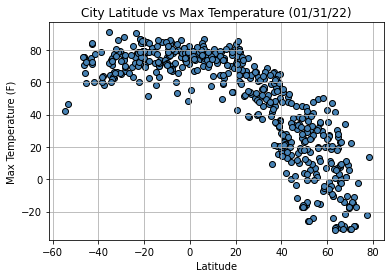

In [38]:
# Latitude vs Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs Max Temperature (01/31/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Fig.1

## Latitude vs. Humidity Plot

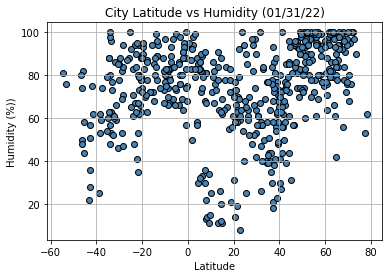

In [40]:
# Latitude vs Humidity scatter plot

plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs Humidity (01/31/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

Fig.2

## Latitude vs. Cloudiness Plot

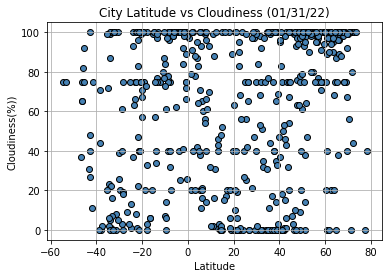

In [45]:
# Latitude vs Cloudiness scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs Cloudiness (01/31/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Fig.3

## Latitude vs. Wind Speed Plot

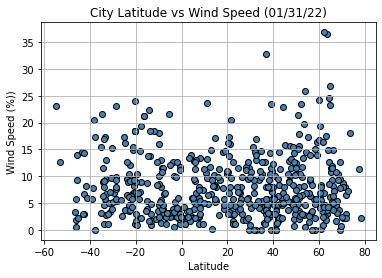

In [124]:
#Latitude vs Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs Wind Speed (01/31/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")

Fig.4

## Linear Regression

In [132]:
# Create Northern and Southern Hemisphere(hemis) DataFrames

northern_hemis = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemis = weather_data.loc[weather_data["Lat"] < 0]



<b> Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8562688869761063
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


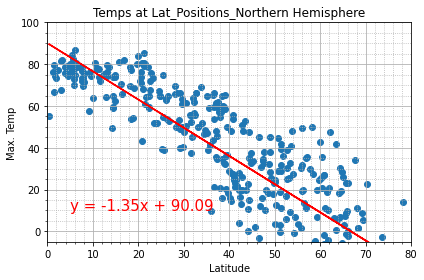

In [169]:
# Creating a function to create Linear Regression plots and adding the linear regression equation and line 
# Scatter Plot for Lattitude vs Temperature of City

x_values = northern_hemis['Lat']
y_values = northern_hemis['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(-5,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Temps at Lat_Positions_Northern Hemisphere')
plt.tight_layout()
plt.savefig("../Images/N_Hemis_Lat_vs_MaxTem.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")

Fig.5

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.26565903227845006
The regression displays a positive correlation.
In the southern hemisphere, temperature appears to be increasing as you get coser to the equator(0).


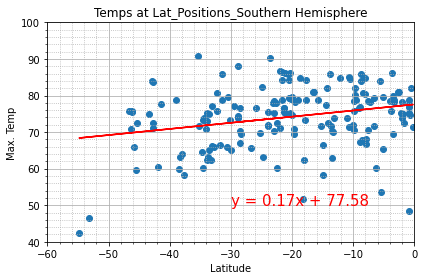

In [170]:

x_values = southern_hemis['Lat']
y_values = southern_hemis['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()
plt.ylim(40,100)
plt.xlim(-60,0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Temps at Lat_Positions_Southern Hemisphere')
plt.tight_layout()
plt.savefig("../Images/S_Hemis_Lat_vs_MaxTem.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, temperature appears to be increasing as you get coser to the equator(0).")

Fig.6

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41425511925778136
The regression displays a positive correlation.
In the northern hemisphere, temperature appears to be increasing as latitude increases.


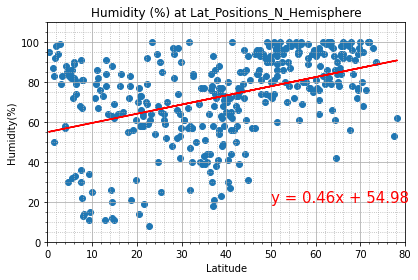

In [176]:
x_values = northern_hemis["Lat"]
y_values = northern_hemis["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
# plt.show()
plt.ylim(0,110)
plt.xlim(0,80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Humidity (%) at Lat_Positions_N_Hemisphere')
plt.tight_layout()
plt.savefig("../Images/N_Hemis_Lat_vs_Humidity.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the northern hemisphere, temperature appears to be increasing as latitude increases.")

Fig.7

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4206674050116985
The regression displays a positive correlation but not strong relationship.
In the northern hemisphere, temperature appears to be decreasing as you go away from the equator.


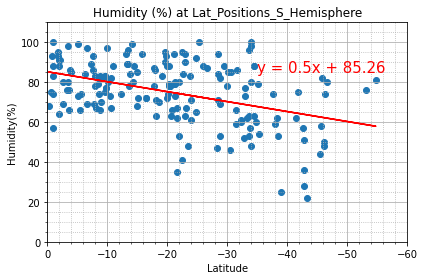

In [177]:
x_values = southern_hemis["Lat"]
y_values = southern_hemis["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-35,85),fontsize=15,color="red")

plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
# plt.show()
plt.ylim(0,110)
plt.xlim(0,-60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Humidity (%) at Lat_Positions_S_Hemisphere')
plt.tight_layout()
plt.savefig("../Images/S_Hemis_Lat_vs_Humidity.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation but not strong relationship.")
print("In the northern hemisphere, temperature appears to be decreasing as you go away from the equator.")

Fig.8

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3028528275060813
The regression displays a positive correlation.
In the northern hemisphere,cloudiness appears to be increasing as you go away from the equator.


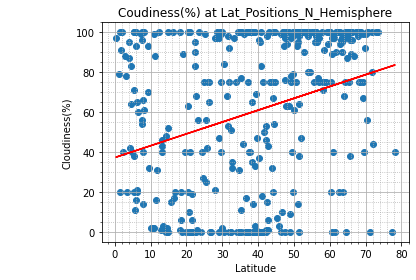

In [194]:
x_values = northern_hemis["Lat"]
y_values = northern_hemis["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")

plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
# plt.show()

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Coudiness(%) at Lat_Positions_N_Hemisphere')
plt.tight_layout()
plt.savefig("../Images/N_Hemis_Lat_vs_Cloudiness.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the northern hemisphere,cloudiness appears to be increasing as you go away from the equator.")

Fig.9

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2982502791151845
The regression displays a weak positive correlation.
The regression does not show much of a correlation between the data sets


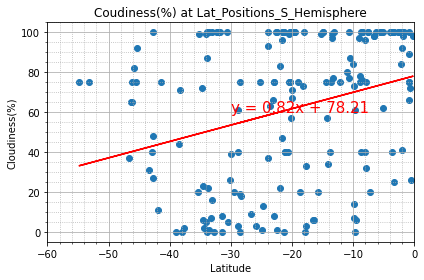

In [193]:
x_values = southern_hemis["Lat"]
y_values = southern_hemis["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
# plt.show()
plt.ylim(-5,105)
plt.xlim(-60,0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Coudiness(%) at Lat_Positions_S_Hemisphere')
plt.tight_layout()
plt.savefig("../Images/S_Hemis_Lat_vs_Cloudiness.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays a weak positive correlation.")
print("The regression does not show much of a correlation between the data sets")

Fig.10

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11003790818482441
The regression displays weak positive correlation.
The regression does not show any correlation between the data sets


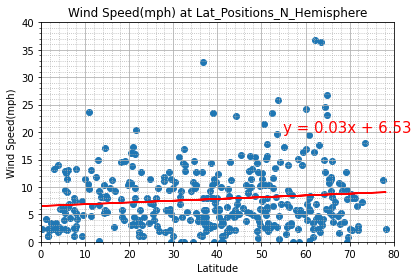

In [203]:
x_values = northern_hemis["Lat"]
y_values = northern_hemis["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(55,20),fontsize=15,color="red")

plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
# plt.show()
plt.ylim(0,40)
plt.xlim(0,80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Wind Speed(mph) at Lat_Positions_N_Hemisphere')
plt.tight_layout()
plt.savefig("../Images/N_Hemis_Lat_vs_Wind_Speed.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays weak positive correlation.")
print("The regression does not show any correlation between the data sets")

Fig.11

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14935084606605745
The regression displays negative correlation.
The regression does not show any correlation between the data sets


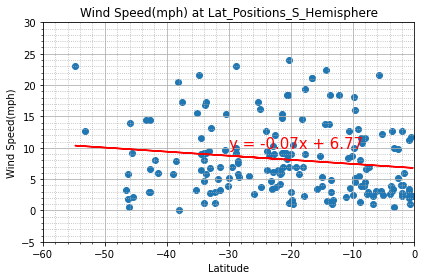

In [204]:
x_values = southern_hemis["Lat"]
y_values = southern_hemis["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
# plt.show()
plt.ylim(-5,30)
plt.xlim(-60,0)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.title('Wind Speed(mph) at Lat_Positions_S_Hemisphere')
plt.tight_layout()
plt.savefig("../Images/S_Hemis_Lat_vs_Wind_Speed.png")

#print correlation coefficient
print(f"The r-squared is: {rvalue}")
print("The regression displays negative correlation.")
print("The regression does not show any correlation between the data sets")

Fig.12